### Read in .csv files to begin removing/adding any model-specific columns

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100


In [2]:
# Function to calculate VIF
def calculate_vif(data):
    import statsmodels.api as sm
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = data.columns
    for i in range(0, x_var_names.shape[0]):
        y = data[x_var_names[i]]
        x = data[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-r_squared),2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)

In [3]:
flights = pd.read_csv('delta_flights_.csv', index_col=0) # the latest flight data, with feature_engineered columns
flights_test = pd.read_csv('delta_flights_test.csv', index_col=0) # the first 7 days of january 2020, with feature_engineered columns - more feature engineering will take place in this notebook
#passengers = pd.read_csv('passengers_jan-dec_18-19.csv') # the latest passenger data

In [4]:
flights.head()

,fl_date,mkt_carrier,origin_airport_id,origin_city_name,dest_airport_id,dest_city_name,crs_dep_time,crs_arr_time,dep_time,arr_time,dep_delay,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,origin_wind_speed,origin_visibility,origin_conditions,dest_wind_speed,dest_visibility,dest_conditions,day_of_the_week,holiday,year,month,scheduled_flight_hour_of_day
305935,2018-01-01,DL,13930,chicago,10397,atlanta,705,1010,704.0,948.0,-1.0,-22.0,125.0,104.0,85.0,606.0,NaN,NaN,NaN,NaN,NaN,12.7,9.9,Clear,14.6,9.9,Partially cloudy,Monday,True,2018,1,7
305763,2018-01-01,DL,12892,los angeles,11298,dallas/fort worth,950,1504,946.0,1438.0,-4.0,-26.0,194.0,172.0,146.0,1235.0,NaN,NaN,NaN,NaN,NaN,5.6,4.4,Clear,15.0,9.9,Partially cloudy,Monday,True,2018,1,9
305762,2018-01-01,DL,11298,dallas/fort worth,12892,los angeles,705,845,702.0,823.0,-3.0,-22.0,220.0,201.0,171.0,1235.0,NaN,NaN,NaN,NaN,NaN,15.0,9.9,Partially cloudy,5.6,4.4,Clear,Monday,True,2018,1,7
305761,2018-01-01,DL,14747,seattle,11292,denver,1355,1746,1355.0,1732.0,0.0,-14.0,171.0,157.0,126.0,1024.0,NaN,NaN,NaN,NaN,NaN,7.0,9.8,Partially cloudy,12.3,9.1,Partially cloudy,Monday,True,2018,1,13
305760,2018-01-01,DL,14747,seattle,11292,denver,1906,2256,1930.0,2300.0,24.0,4.0,170.0,150.0,123.0,1024.0,NaN,NaN,NaN,NaN,NaN,7.0,9.8,Partially cloudy,12.3,9.1,Partially cloudy,Monday,True,2018,1,19


In [5]:
flights_test.head()

,fl_date,mkt_carrier,origin_airport_id,origin_city_name,dest_airport_id,dest_city_name,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,origin_wind_speed,origin_visibility,origin_conditions,dest_wind_speed,dest_visibility,dest_conditions,day_of_the_week,holiday,year,month,scheduled_flight_hour_of_day
2883,1/1/2020,DL,12953,new york,11278,washington,1900,2022,82,214,15.1,9.9,Overcast,14.7,9.9,Partially cloudy,Wednesday,True,2020,1,19
2715,1/1/2020,DL,13232,chicago,10397,atlanta,600,901,121,591,19.6,9.9,"Snow, Partially cloudy",12.0,9.9,Clear,Wednesday,True,2020,1,6
2714,1/1/2020,DL,10397,atlanta,14747,seattle,1125,1400,335,2182,12.0,9.9,Clear,16.4,9.9,Overcast,Wednesday,True,2020,1,11
2713,1/1/2020,DL,10397,atlanta,12892,los angeles,1925,2120,295,1947,12.0,9.9,Clear,7.5,9.5,Clear,Wednesday,True,2020,1,19
2712,1/1/2020,DL,11278,washington,12478,new york,600,718,78,213,14.7,9.9,Partially cloudy,15.1,9.9,Overcast,Wednesday,True,2020,1,6


In [6]:
flights['dest_city_name'].unique()

array(['atlanta', 'dallas/fort worth', 'los angeles', 'denver', 'seattle',
       'new york', 'houston', 'charlotte', 'chicago', 'washington'],
      dtype=object)

### One-Hot encoding for:
- weather
- origin_city_name and dest_city_name
- day_of_week

In [7]:
flights.columns

Index(['fl_date', 'mkt_carrier', 'origin_airport_id', 'origin_city_name',
       'dest_airport_id', 'dest_city_name', 'crs_dep_time', 'crs_arr_time',
       'dep_time', 'arr_time', 'dep_delay', 'arr_delay', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'distance', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'origin_wind_speed', 'origin_visibility', 'origin_conditions',
       'dest_wind_speed', 'dest_visibility', 'dest_conditions',
       'day_of_the_week', 'holiday', 'year', 'month',
       'scheduled_flight_hour_of_day'],
      dtype='object')

In [8]:
origin_airport_id = pd.get_dummies(flights['origin_airport_id'], prefix='origin')
dest_airport_id = pd.get_dummies(flights['dest_airport_id'], prefix='dest')

day_of_week = pd.get_dummies(flights['day_of_the_week'])

In [9]:
# We want to change "Rain, Overcast" to Rain = 1, Cloudy = 1
flights['origin_rain'] = 0
flights['origin_cloudy'] = 0
flights['origin_snow'] = 0
flights['dest_rain'] = 0
flights['dest_cloudy'] = 0
flights['dest_snow'] = 0

# go through each condition, setting all 3 relevant columns
# there is probably a better way but i know this will work for now...

flights.loc[flights['origin_conditions'] == 'Partially cloudy', 'origin_rain'] = 0
flights.loc[flights['origin_conditions'] == 'Partially cloudy', 'origin_cloudy'] = 0.5
flights.loc[flights['origin_conditions'] == 'Partially cloudy', 'origin_snow'] = 0
flights.loc[flights['dest_conditions'] == 'Partially cloudy', 'dest_rain'] = 0
flights.loc[flights['dest_conditions'] == 'Partially cloudy', 'dest_cloudy'] = 0.5
flights.loc[flights['dest_conditions'] == 'Partially cloudy', 'dest_snow'] = 0

flights.loc[flights['origin_conditions'] == 'Clear', 'origin_rain'] = 0
flights.loc[flights['origin_conditions'] == 'Clear', 'origin_cloudy'] = 0
flights.loc[flights['origin_conditions'] == 'Clear', 'origin_snow'] = 0
flights.loc[flights['dest_conditions'] == 'Clear', 'dest_rain'] = 0
flights.loc[flights['dest_conditions'] == 'Clear', 'dest_cloudy'] = 0
flights.loc[flights['dest_conditions'] == 'Clear', 'dest_snow'] = 0

flights.loc[flights['origin_conditions'] == 'Rain, Overcast', 'origin_rain'] = 1
flights.loc[flights['origin_conditions'] == 'Rain, Overcast', 'origin_cloudy'] = 1
flights.loc[flights['origin_conditions'] == 'Rain, Overcast', 'origin_snow'] = 0
flights.loc[flights['dest_conditions'] == 'Rain, Overcast', 'dest_rain'] = 1
flights.loc[flights['dest_conditions'] == 'Rain, Overcast', 'dest_cloudy'] = 1
flights.loc[flights['dest_conditions'] == 'Rain, Overcast', 'dest_snow'] = 0

flights.loc[flights['origin_conditions'] == 'Rain, Partially cloudy', 'origin_rain'] = 1
flights.loc[flights['origin_conditions'] == 'Rain, Partially cloudy', 'origin_cloudy'] = 0.5
flights.loc[flights['origin_conditions'] == 'Rain, Partially cloudy', 'origin_snow'] = 0
flights.loc[flights['dest_conditions'] == 'Rain, Partially cloudy', 'dest_rain'] = 1
flights.loc[flights['dest_conditions'] == 'Rain, Partially cloudy', 'dest_cloudy'] = 0.5
flights.loc[flights['dest_conditions'] == 'Rain, Partially cloudy', 'dest_snow'] = 0

flights.loc[flights['origin_conditions'] == 'Overcast', 'origin_rain'] = 0
flights.loc[flights['origin_conditions'] == 'Overcast', 'origin_cloudy'] = 1
flights.loc[flights['origin_conditions'] == 'Overcast', 'origin_snow'] = 0
flights.loc[flights['dest_conditions'] == 'Overcast', 'dest_rain'] = 0
flights.loc[flights['dest_conditions'] == 'Overcast', 'dest_cloudy'] = 1
flights.loc[flights['dest_conditions'] == 'Overcast', 'dest_snow'] = 0

flights.loc[flights['origin_conditions'] == 'Snow, Partially cloudy', 'origin_rain'] = 0
flights.loc[flights['origin_conditions'] == 'Snow, Partially cloudy', 'origin_cloudy'] = 0.5
flights.loc[flights['origin_conditions'] == 'Snow, Partially cloudy', 'origin_snow'] = 1
flights.loc[flights['dest_conditions'] == 'Snow, Partially cloudy', 'dest_rain'] = 0
flights.loc[flights['dest_conditions'] == 'Snow, Partially cloudy', 'dest_cloudy'] = 0.5
flights.loc[flights['dest_conditions'] == 'Snow, Partially cloudy', 'dest_snow'] = 1

flights.loc[flights['origin_conditions'] == 'Rain', 'origin_rain'] = 1
flights.loc[flights['origin_conditions'] == 'Rain', 'origin_cloudy'] = 0
flights.loc[flights['origin_conditions'] == 'Rain', 'origin_snow'] = 0
flights.loc[flights['dest_conditions'] == 'Rain', 'dest_rain'] = 1
flights.loc[flights['dest_conditions'] == 'Rain', 'dest_cloudy'] = 0
flights.loc[flights['dest_conditions'] == 'Rain', 'dest_snow'] = 0

flights.loc[flights['origin_conditions'] == 'Snow, Overcast', 'origin_rain'] = 0
flights.loc[flights['origin_conditions'] == 'Snow, Overcast', 'origin_cloudy'] = 1
flights.loc[flights['origin_conditions'] == 'Snow, Overcast', 'origin_snow'] = 1
flights.loc[flights['dest_conditions'] == 'Snow, Overcast', 'dest_rain'] = 0
flights.loc[flights['dest_conditions'] == 'Snow, Overcast', 'dest_cloudy'] = 1
flights.loc[flights['dest_conditions'] == 'Snow, Overcast', 'dest_snow'] = 1

flights.loc[flights['origin_conditions'] == 'Snow', 'origin_rain'] = 0
flights.loc[flights['origin_conditions'] == 'Snow', 'origin_cloudy'] = 0
flights.loc[flights['origin_conditions'] == 'Snow', 'origin_snow'] = 1
flights.loc[flights['dest_conditions'] == 'Snow', 'dest_rain'] = 0
flights.loc[flights['dest_conditions'] == 'Snow', 'dest_cloudy'] = 0
flights.loc[flights['dest_conditions'] == 'Snow', 'dest_snow'] = 1

flights = flights.drop(columns=['origin_conditions', 'dest_conditions'])

### Key model columns

In [10]:
# include NEW weather columns & historical_arr_delay
df_flights = pd.concat((
    day_of_week, 
    origin_airport_id, 
    #origin_conditions, 
    flights['origin_rain'], 
    flights['origin_cloudy'], 
    flights['origin_snow'], 
    flights['origin_visibility'], 
    flights['origin_wind_speed'],
    dest_airport_id, 
    #dest_conditions, 
    flights['dest_rain'], 
    flights['dest_cloudy'], 
    flights['dest_snow'], 
    flights['dest_visibility'], 
    flights['dest_wind_speed'], 
    flights['holiday'], 
    flights['scheduled_flight_hour_of_day'], 
    flights['distance'],
    
    flights['arr_delay'] # target variable
), axis=1)

df_flights = df_flights.dropna()

In [11]:
df_flights.shape

(301892, 49)

In [12]:
#flights['holiday'] = flights['holiday'].astype(int)

#dest_conditions = pd.get_dummies(flights['dest_conditions'], prefix='dest')
#origin_conditions = pd.get_dummies(flights['origin_conditions'], prefix='origin')

# origin_airport_id = pd.get_dummies(flights['origin_airport_id'], prefix='origin')
# dest_airport_id = pd.get_dummies(flights['dest_airport_id'], prefix='dest')

# day_of_week = pd.get_dummies(flights['day_of_the_week'])

# df_flights = pd.concat((
#     day_of_week, 
#     origin_airport_id, 
#     origin_conditions, 
#     flights['origin_visibility'], flights['origin_wind_speed'], 
#     dest_airport_id, 
#     dest_conditions, 
#     flights['dest_visibility'], flights['dest_wind_speed'], 
#     flights['holiday'], 
#     flights['scheduled_flight_hour_of_day'], 
#     flights['distance'],
#     flights['arr_delay'] # target variable
# ), axis=1)

# df_flights = df_flights.dropna()

In [13]:
# the top 100 values in calue_counts sums up to roughly 97% of all data, which is 3 standard deviations worth
# drop anything else

# this change did NOT help the model, it made it significantly worse
#flights = flights.drop(flights[flights.arr_delay < 82].index)

# Linear Regression
### Model-Specific

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample,shuffle
from sklearn import preprocessing

from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

import xgboost as xgb
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor

In [15]:
X = df_flights.drop(columns=['arr_delay'])
y = df_flights['arr_delay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

### Baseline model

In [16]:
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

In [17]:
y_preds = clf.predict(X_test)

In [18]:
clf.score(X_test, y_test)

0.05898139737170649

In [19]:
# can only go up from here

In [20]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear',  random_state = 101)

In [21]:
xg_reg.fit(X_train, y_train)

[10:42:06] WARNING: d:\bld\xgboost-split_1631904903843\work\src\objective\regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1,
             objective='reg:linear', random_state=101, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [22]:
y_preds = xg_reg.predict(X_test)

In [23]:
xg_reg.score(X_test, y_test)

0.17755166381458576

In [24]:
rmse = np.sqrt(mean_squared_error(y_test, y_preds))
print("RMSE: %f" % (rmse))

RMSE: 52.337738


### Some tweaking

In [25]:
def run_xg_reg():
    '''
    This function calls the (currently) best XGB model to generate results.
    This function helps speed up the tuning process.
    '''
    
    xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.3, max_depth = 6, reg_alpha = 0.0001, n_estimators = 100, reg_lambda = 5, random_state = 101)
    xg_reg.fit(X_train, y_train)
    y_preds = xg_reg.predict(X_test)
    print(f'R^2: {xg_reg.score(X_test, y_test)}')
    rmse = np.sqrt(mean_squared_error(y_test, y_preds))
    print("RMSE: %f" % (rmse))
    return y_preds
y_preds = run_xg_reg()

R^2: 0.18004817554526642
RMSE: 52.258243


In [26]:
#calculate_vif(df_flights)

### Dealing with multicollinearity:
https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/

- Dropping one of the one-hot labels to try and avoid "inf." for variance inflation 

In [27]:
# include NEW weather columns
df_flights = pd.concat((
    day_of_week,
    flights['month'],
    flights['year'],
    origin_airport_id, 
    #origin_conditions, 
    flights['origin_rain'], 
    flights['origin_cloudy'], 
    flights['origin_snow'], 
    flights['origin_visibility'], 
    flights['origin_wind_speed'],
    dest_airport_id, 
    #dest_conditions, 
    flights['dest_rain'], 
    flights['dest_cloudy'], 
    flights['dest_snow'], 
    flights['dest_visibility'], 
    flights['dest_wind_speed'], 
    flights['holiday'], 
    flights['scheduled_flight_hour_of_day'], 
    flights['distance'],
    #flights_19['historical_arr_delay'],
    flights['arr_delay'] # target variable
), axis=1)

df_flights = df_flights.dropna()

In [28]:
df_flights

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,month,year,origin_10397,origin_11057,origin_11278,origin_11292,origin_11298,origin_12191,origin_12264,origin_12266,origin_12478,origin_12892,origin_12953,origin_13232,origin_13930,origin_14747,origin_rain,origin_cloudy,origin_snow,origin_visibility,origin_wind_speed,dest_10397,dest_11057,dest_11278,dest_11292,dest_11298,dest_12191,dest_12264,dest_12266,dest_12478,dest_12892,dest_12953,dest_13232,dest_13930,dest_14747,dest_rain,dest_cloudy,dest_snow,dest_visibility,dest_wind_speed,holiday,scheduled_flight_hour_of_day,distance,arr_delay
305935,0,1,0,0,0,0,0,1,2018,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,9.9,12.7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0,9.9,14.6,True,7,606.0,-22.0
305763,0,1,0,0,0,0,0,1,2018,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0,4.4,5.6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.5,0,9.9,15.0,True,9,1235.0,-26.0
305762,0,1,0,0,0,0,0,1,2018,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.5,0,9.9,15.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0,4.4,5.6,True,7,1235.0,-22.0
305761,0,1,0,0,0,0,0,1,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.5,0,9.8,7.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.5,0,9.1,12.3,True,13,1024.0,-14.0
305760,0,1,0,0,0,0,0,1,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.5,0,9.8,7.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.5,0,9.1,12.3,True,19,1024.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,0,0,0,0,0,1,0,12,2019,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.0,0,9.4,20.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0,9.9,4.2,True,15,954.0,-16.0
162,0,0,0,0,0,1,0,12,2019,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1.0,0,9.6,14.4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0,9.9,4.2,True,9,2475.0,-45.0
161,0,0,0,0,0,1,0,12,2019,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0,9.9,4.2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,9.9,18.6,True,11,1947.0,-8.0
174,0,0,0,0,0,1,0,12,2019,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0,9.3,8.9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,9.9,18.6,True,11,689.0,-25.0


In [29]:
columns_to_drop = [
    'Tuesday', 
    'origin_12478', 
    'dest_11278', 
    #'dest_Clear', 
    #'origin_Clear' 
]

In [30]:
df_flights = df_flights.drop(columns=columns_to_drop)

In [31]:
#calculate_vif(df_flights)

In [32]:
X = df_flights.drop(columns=['arr_delay'])
y = df_flights['arr_delay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [33]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.3, max_depth = 6, reg_alpha = 0.0001, n_estimators = 100, reg_lambda = 5, random_state = 101)
xg_reg.fit(X_train, y_train)
y_preds = xg_reg.predict(X_test)
print(f'R^2: {xg_reg.score(X_test, y_test)}')
rmse = np.sqrt(mean_squared_error(y_test, y_preds))
print("RMSE: %f" % (rmse))

R^2: 0.19507181644052363
RMSE: 51.777276


# RandomForestRegressor

In [34]:
param_grid = { 
    'n_estimators': [200],
    'max_features': ['sqrt'],
    'max_depth' : [8],
    'criterion' :['mse'],
    'random_state' : [101]
}

In [35]:
regr = RandomForestRegressor(n_jobs=-1, random_state=101)

In [36]:
CV_regr = GridSearchCV(estimator=regr, param_grid=param_grid, cv=5, verbose=2)
CV_regr.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END criterion=mse, max_depth=8, max_features=sqrt, n_estimators=200, random_state=101; total time=   5.4s
[CV] END criterion=mse, max_depth=8, max_features=sqrt, n_estimators=200, random_state=101; total time=   3.8s
[CV] END criterion=mse, max_depth=8, max_features=sqrt, n_estimators=200, random_state=101; total time=   4.0s
[CV] END criterion=mse, max_depth=8, max_features=sqrt, n_estimators=200, random_state=101; total time=   3.9s
[CV] END criterion=mse, max_depth=8, max_features=sqrt, n_estimators=200, random_state=101; total time=   3.8s


GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=101),
             param_grid={'criterion': ['mse'], 'max_depth': [8],
                         'max_features': ['sqrt'], 'n_estimators': [200],
                         'random_state': [101]},
             verbose=2)

In [37]:
cv_results = pd.DataFrame(CV_regr.cv_results_)
cv_results.sort_values(by=['rank_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.12298,0.618294,0.170544,0.001093,mse,8,sqrt,200,101,"{'criterion': 'mse', 'max_depth': 8, 'max_feat...",0.083783,0.084653,0.078874,0.085209,0.08172,0.082848,0.002314,1


In [38]:
print(f'Best Estimator: {CV_regr.best_estimator_}')
print(f'Best Params: {CV_regr.best_params_}')
print(f'Best Score: {CV_regr.best_score_}')

Best Estimator: RandomForestRegressor(max_depth=8, max_features='sqrt', n_estimators=200,
                      n_jobs=-1, random_state=101)
Best Params: {'criterion': 'mse', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200, 'random_state': 101}
Best Score: 0.08284779748782733


In [39]:
y_preds = CV_regr.predict(X_test)
print(f'R^2: {CV_regr.score(X_test, y_test)}')
rmse = np.sqrt(mean_squared_error(y_test, y_preds))
print("RMSE: %f" % (rmse))

R^2: 0.08466375751652633
RMSE: 55.214223


# Let's try with ridiculous parameters.. note: this is probably overfitting (if not already...)

In [40]:
param_grid = { 
    'n_estimators': [200],
    'max_features': ['sqrt'],
    'criterion' :['mse'],
    'random_state' : [101]
}

In [41]:
CV_regr = GridSearchCV(estimator=regr, param_grid=param_grid, cv=5, verbose=3)
CV_regr.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=mse, max_features=sqrt, n_estimators=200, random_state=101;, score=0.196 total time=  12.8s
[CV 2/5] END criterion=mse, max_features=sqrt, n_estimators=200, random_state=101;, score=0.195 total time=  12.8s
[CV 3/5] END criterion=mse, max_features=sqrt, n_estimators=200, random_state=101;, score=0.200 total time=  12.9s
[CV 4/5] END criterion=mse, max_features=sqrt, n_estimators=200, random_state=101;, score=0.194 total time=  13.1s
[CV 5/5] END criterion=mse, max_features=sqrt, n_estimators=200, random_state=101;, score=0.194 total time=  12.8s


GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=101),
             param_grid={'criterion': ['mse'], 'max_features': ['sqrt'],
                         'n_estimators': [200], 'random_state': [101]},
             verbose=3)

In [42]:
cv_results = pd.DataFrame(CV_regr.cv_results_)
cv_results.sort_values(by=['rank_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,param_n_estimators,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,12.467478,0.123833,0.5238,0.012825,mse,sqrt,200,101,"{'criterion': 'mse', 'max_features': 'sqrt', '...",0.196436,0.194885,0.200323,0.194364,0.19387,0.195976,0.002338,1


In [43]:
print(f'Best Estimator: {CV_regr.best_estimator_}')
print(f'Best Params: {CV_regr.best_params_}')
print(f'Best Score: {CV_regr.best_score_}')

Best Estimator: RandomForestRegressor(max_features='sqrt', n_estimators=200, n_jobs=-1,
                      random_state=101)
Best Params: {'criterion': 'mse', 'max_features': 'sqrt', 'n_estimators': 200, 'random_state': 101}
Best Score: 0.19597576981691076


In [44]:
y_preds = CV_regr.predict(X_test)
print(f'R^2: {CV_regr.score(X_test, y_test)}')
rmse = np.sqrt(mean_squared_error(y_test, y_preds))
print("RMSE: %f" % (rmse))

R^2: 0.21124413357890182
RMSE: 51.254492


### We're going to remove outliers - any data that doesn't fit in the top 250 values

In [45]:
df_flights[['arr_delay']].value_counts()[:250].sum() / len(df_flights['arr_delay']) #

0.9860115538006969

### Note: we're still keeping 98.6% of the original data

In [46]:
arr_delay_values = df_flights[['arr_delay']].value_counts()[:250].index.to_list() 

In [47]:
arr_delay_values = pd.DataFrame(arr_delay_values)

In [48]:
arr_delay_values.max()

0    213.0
dtype: float64

In [49]:
arr_delay_values.min()[0]

-56.0

### Filter out using max and min values

In [50]:
# include NEW weather columns
df_flights = pd.concat((
    day_of_week,
    flights['month'],
    flights['year'],
    origin_airport_id, 
    #origin_conditions, 
    flights['origin_rain'], 
    flights['origin_cloudy'], 
    flights['origin_snow'], 
    flights['origin_visibility'], 
    flights['origin_wind_speed'],
    dest_airport_id, 
    #dest_conditions, 
    flights['dest_rain'], 
    flights['dest_cloudy'], 
    flights['dest_snow'], 
    flights['dest_visibility'], 
    flights['dest_wind_speed'], 
    flights['holiday'], 
    flights['scheduled_flight_hour_of_day'], 
    flights['distance'],
    flights['arr_delay'] # target variable
), axis=1)

df_flights = df_flights.dropna()

In [51]:
# remove EXTREME outliers
df_filter = (df_flights['arr_delay'] > arr_delay_values.min()[0]) & (df_flights['arr_delay'] < arr_delay_values.max()[0])
df_flights = df_flights[df_filter]

In [52]:
columns_to_drop = [
    'Tuesday',
    #'Friday', 
    #'origin_12478', 
    #'dest_11278',
    'origin_10397',
    'dest_10397'
]

In [53]:
df_flights = df_flights.drop(columns=columns_to_drop)

In [54]:
df_flights.shape

(298272, 48)

In [55]:
#calculate_vif(df_flights)

In [56]:
X = df_flights.drop(columns=['arr_delay'])
y = df_flights['arr_delay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

# RandomForestRegressor

In [57]:
param_grid = { 
    'n_estimators': [400],
    'max_features': ['sqrt'],
    'criterion' :['mse'],
    'random_state' : [101]
}

In [58]:
CV_regr = GridSearchCV(estimator=regr, param_grid=param_grid, cv=10, verbose=3)
CV_regr.fit(X_train, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV 1/10] END criterion=mse, max_features=sqrt, n_estimators=400, random_state=101;, score=0.274 total time=  28.7s
[CV 2/10] END criterion=mse, max_features=sqrt, n_estimators=400, random_state=101;, score=0.277 total time=  28.6s
[CV 3/10] END criterion=mse, max_features=sqrt, n_estimators=400, random_state=101;, score=0.287 total time=  28.5s
[CV 4/10] END criterion=mse, max_features=sqrt, n_estimators=400, random_state=101;, score=0.270 total time=  30.2s
[CV 5/10] END criterion=mse, max_features=sqrt, n_estimators=400, random_state=101;, score=0.281 total time=  29.3s
[CV 6/10] END criterion=mse, max_features=sqrt, n_estimators=400, random_state=101;, score=0.286 total time=  29.1s
[CV 7/10] END criterion=mse, max_features=sqrt, n_estimators=400, random_state=101;, score=0.277 total time=  29.4s
[CV 8/10] END criterion=mse, max_features=sqrt, n_estimators=400, random_state=101;, score=0.273 total time=  28.9s
[CV 9/10] E

GridSearchCV(cv=10,
             estimator=RandomForestRegressor(n_jobs=-1, random_state=101),
             param_grid={'criterion': ['mse'], 'max_features': ['sqrt'],
                         'n_estimators': [400], 'random_state': [101]},
             verbose=3)

In [59]:
cv_results = pd.DataFrame(CV_regr.cv_results_)
cv_results.sort_values(by=['rank_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,param_n_estimators,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,28.658049,0.495483,0.520409,0.056426,mse,sqrt,400,101,"{'criterion': 'mse', 'max_features': 'sqrt', '...",0.27368,0.277003,0.287099,0.269636,0.281032,0.28582,0.276613,0.272947,0.261456,0.281253,0.276654,0.007324,1


In [60]:
print(f'Best Estimator: {CV_regr.best_estimator_}')
print(f'Best Params: {CV_regr.best_params_}')
print(f'Best Score: {CV_regr.best_score_}')

Best Estimator: RandomForestRegressor(max_features='sqrt', n_estimators=400, n_jobs=-1,
                      random_state=101)
Best Params: {'criterion': 'mse', 'max_features': 'sqrt', 'n_estimators': 400, 'random_state': 101}
Best Score: 0.2766537823135854


In [61]:
y_preds = CV_regr.predict(X_test)
print(f'R^2: {CV_regr.score(X_test, y_test)}')
rmse = np.sqrt(mean_squared_error(y_test, y_preds))
print("RMSE: %f" % (rmse))

R^2: 0.28255168407285325
RMSE: 28.451895


# Let's try with XGBoost to see if there was an improvement...

In [62]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.15, max_depth = 9, reg_alpha = 0.1, n_estimators = 400, reg_lambda = 5, random_state = 101) # r^2 = 0.321
xg_reg.fit(X_train, y_train)
y_preds = xg_reg.predict(X_test)
print(f'R^2: {xg_reg.score(X_test, y_test)}')
rmse = np.sqrt(mean_squared_error(y_test, y_preds))
print("RMSE: %f" % (rmse))

R^2: 0.3212315816869914
RMSE: 27.674303


In [63]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.15, max_depth = 9, reg_alpha = 0.1, n_estimators = 400, reg_lambda = 7, random_state = 101) # r^2 = 0.319
xg_reg.fit(X_train, y_train)
y_preds = xg_reg.predict(X_test)
print(f'R^2: {xg_reg.score(X_test, y_test)}')
rmse = np.sqrt(mean_squared_error(y_test, y_preds))
print("RMSE: %f" % (rmse))

R^2: 0.3190451846616149
RMSE: 27.718839


In [64]:
# BEST MODEL
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.15, max_depth = 9, reg_alpha = 0.1, n_estimators = 400, reg_lambda = 6, random_state = 101) # r^2 = 0.3217
xg_reg.fit(X_train, y_train)
y_preds = xg_reg.predict(X_test)
print(f'R^2: {xg_reg.score(X_test, y_test)}')
rmse = np.sqrt(mean_squared_error(y_test, y_preds))
print("RMSE: %f" % (rmse))

R^2: 0.3217069585590985
RMSE: 27.664611


In [130]:
graph_df = X_test.copy()
graph_df['arr_delay'] = y_test
graph_df['predicted'] = y_preds
graph_df['difference'] = graph_df['predicted'] - graph_df['arr_delay']
graph_df = graph_df.sort_index(ascending=False)
graph_df = graph_df.reset_index(drop=True)

In [131]:
graph_df

,Friday,Monday,Saturday,Sunday,Thursday,Wednesday,month,year,origin_11057,origin_11278,origin_11292,origin_11298,origin_12191,origin_12264,origin_12266,origin_12478,origin_12892,origin_12953,origin_13232,origin_13930,origin_14747,origin_rain,origin_cloudy,origin_snow,origin_visibility,origin_wind_speed,dest_11057,dest_11278,dest_11292,dest_11298,dest_12191,dest_12264,dest_12266,dest_12478,dest_12892,dest_12953,dest_13232,dest_13930,dest_14747,dest_rain,dest_cloudy,dest_snow,dest_visibility,dest_wind_speed,holiday,scheduled_flight_hour_of_day,distance,arr_delay,predicted,difference
0,0,1,0,0,0,0,1,2018,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,0,9.9,12.9,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.5,0,9.1,12.3,True,18,1620.0,-49.0,3.280668,52.280668
1,0,1,0,0,0,0,1,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0,9.9,14.6,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.0,0,9.9,12.9,True,10,760.0,94.0,5.897504,-88.102496
2,0,1,0,0,0,0,1,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0,9.9,14.6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,0,9.9,12.9,True,21,762.0,-15.0,11.771609,26.771609
3,0,1,0,0,0,0,1,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0,9.9,14.6,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,9.9,12.7,True,11,606.0,-22.0,7.564217,29.564217
4,0,1,0,0,0,0,1,2018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0,9.9,12.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0,9.9,14.6,True,15,226.0,-25.0,-10.859587,14.140413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74563,0,0,0,0,0,0,12,2019,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,8.7,15.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,9.9,18.6,True,12,547.0,-15.0,-13.436626,1.563374
74564,0,0,0,0,0,0,12,2019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,9.9,18.6,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1.0,0,9.6,14.4,True,18,762.0,-19.0,1.245962,20.245962
74565,0,0,0,0,0,0,12,2019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,9.9,18.6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0,9.3,8.9,True,15,689.0,-22.0,-19.004335,2.995665
74566,0,0,0,0,0,0,12,2019,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0,9.9,4.2,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.0,0,9.4,20.0,True,17,954.0,14.0,3.334173,-10.665827


In [132]:
graph_df['arr_delay'].value_counts()

-13.0     2044
-12.0     2029
-14.0     2028
-11.0     1967
-8.0      1958
          ... 
 179.0       6
 199.0       6
 205.0       5
 200.0       5
 207.0       5
Name: arr_delay, Length: 268, dtype: int64

In [133]:
y_test = y_test.to_numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

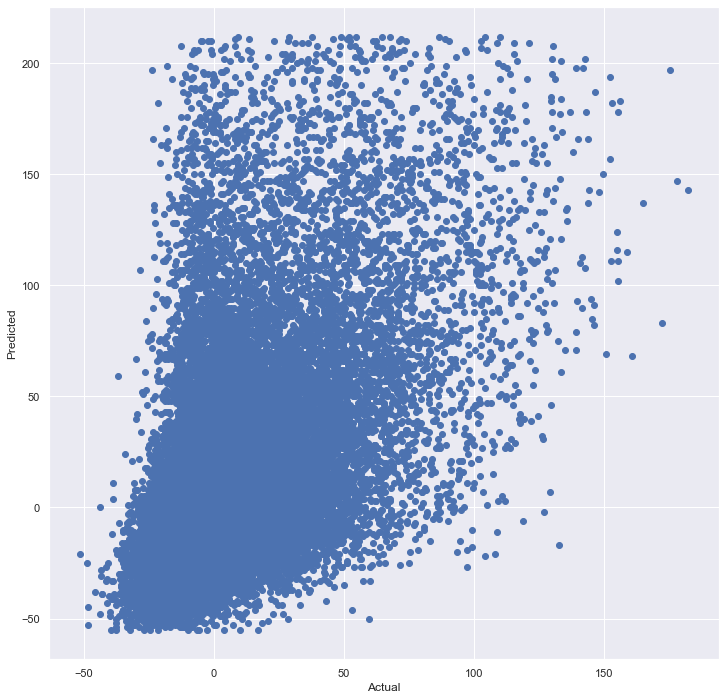

In [159]:
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(12, 12)})
#regression line
y_test, y_preds = y_test.reshape(-1,1), y_preds.reshape(-1,1)
ax.scatter(y_preds, y_test)
#ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')


#ax.plot(y_test, y_preds)

plt.show()

<AxesSubplot:xlabel='arr_delay', ylabel='Count'>

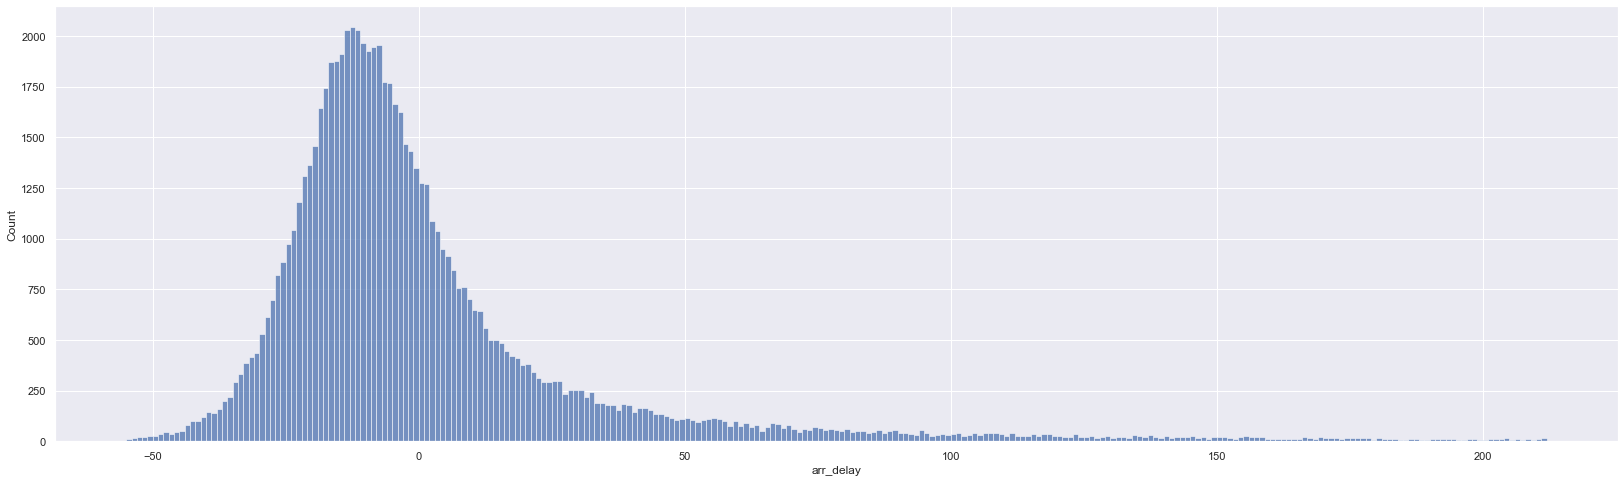

In [135]:
sns.set(rc={'figure.figsize':(28, 8)})
sns.histplot(data=graph_df, x="arr_delay", binwidth=1)

In [136]:
graph_df['predicted'] = round(graph_df['predicted'],2)

In [137]:
graph_df['predicted']

0         3.28
1         5.90
2        11.77
3         7.56
4       -10.86
         ...  
74563   -13.44
74564     1.25
74565   -19.00
74566     3.33
74567    -0.90
Name: predicted, Length: 74568, dtype: float32

(array([[0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
         5.000e+00, 1.000e+00, 2.000e+00, 4.000e+00, 6.000e+00, 6.000e+00,
         7.000e+00, 9.000e+00, 1.400e+01, 2.100e+01, 2.300e+01, 3.200e+01,
         4.900e+01, 4.400e+01, 6.100e+01, 7.900e+01, 1.160e+02, 1.120e+02,
         1.750e+02, 1.960e+02, 2.560e+02, 3.300e+02, 4.020e+02, 5.130e+02,
         6.000e+02, 7.430e+02, 9.390e+02, 1.082e+03, 1.232e+03, 1.522e+03,
         1.798e+03, 2.113e+03, 2.400e+03, 2.525e+03, 2.752e+03, 2.938e+03,
         3.032e+03, 3.149e+03, 3.097e+03, 2.951e+03, 2.834e+03, 2.745e+03,
         2.434e+03, 2.220e+03, 2.064e+03, 1.982e+03, 1.756e+03, 1.544e+03,
         1.406e+03, 1.330e+03, 1.226e+03, 1.089e+03, 1.029e+03, 9.960e+02,
         8.770e+02, 8.300e+02, 7.460e+02, 6.520e+02, 6.670e+02, 5.820e+02,
         5.310e+02, 5.210e+02, 4.690e+02, 3.930e+02, 4.410e+02, 3.600e+02,
         3.440e+02, 3.090e+02, 2.980e+02, 2.810e+02, 2.760e+02, 2.250e+02,
         2.310e+02, 2.220

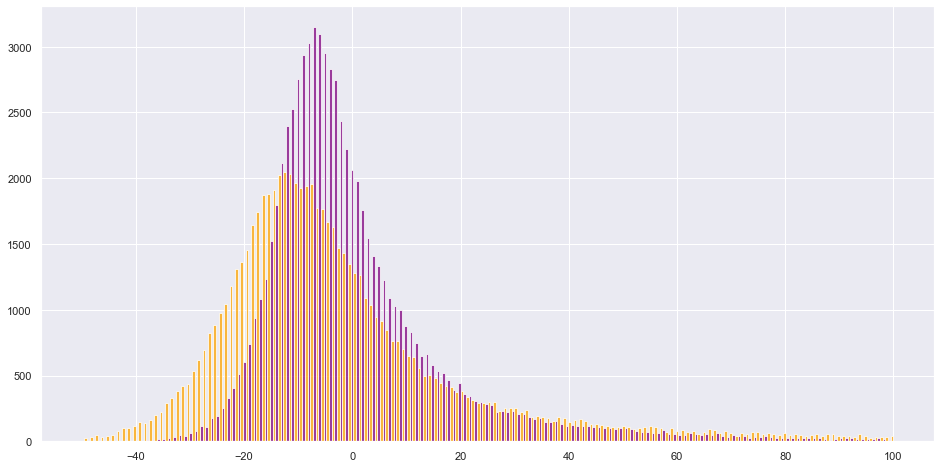

In [156]:
sns.set(rc={'figure.figsize':(16, 8)})
plt.hist([graph_df['predicted'], graph_df['arr_delay']], color=['purple','orange'], alpha=0.75, bins=151, range=(-50,100), rwidth=50)

<AxesSubplot:xlabel='predicted', ylabel='Count'>

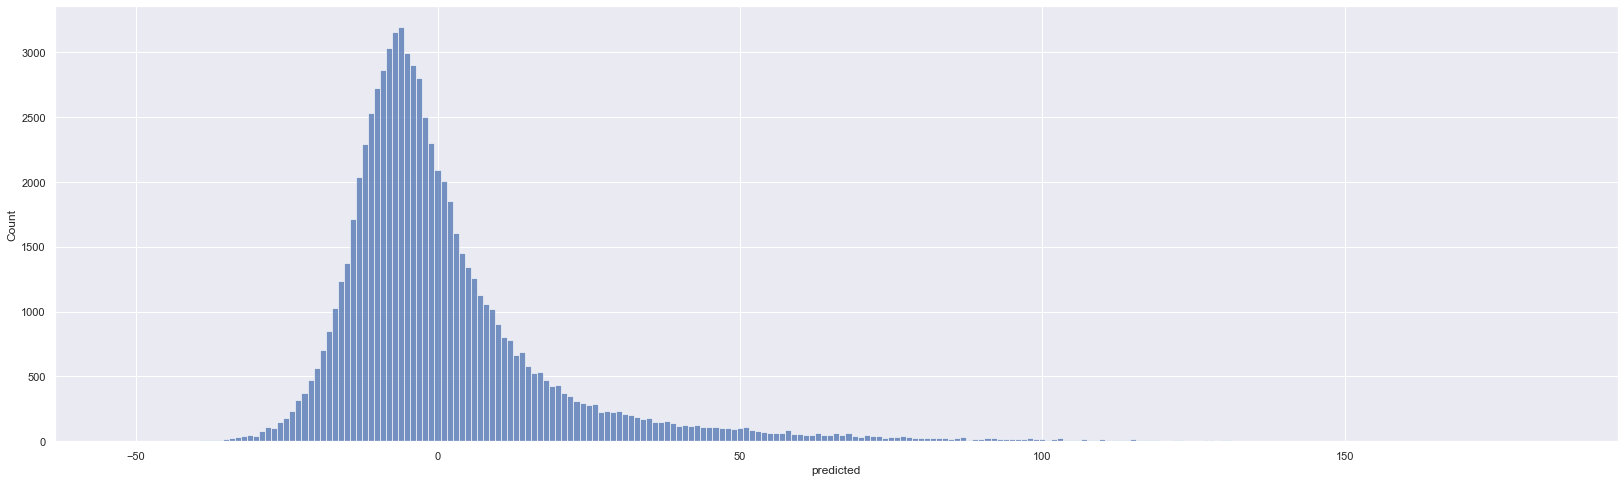

In [138]:
sns.set(rc={'figure.figsize':(28, 8)})
sns.histplot(data=graph_df, x="predicted", binwidth=1)

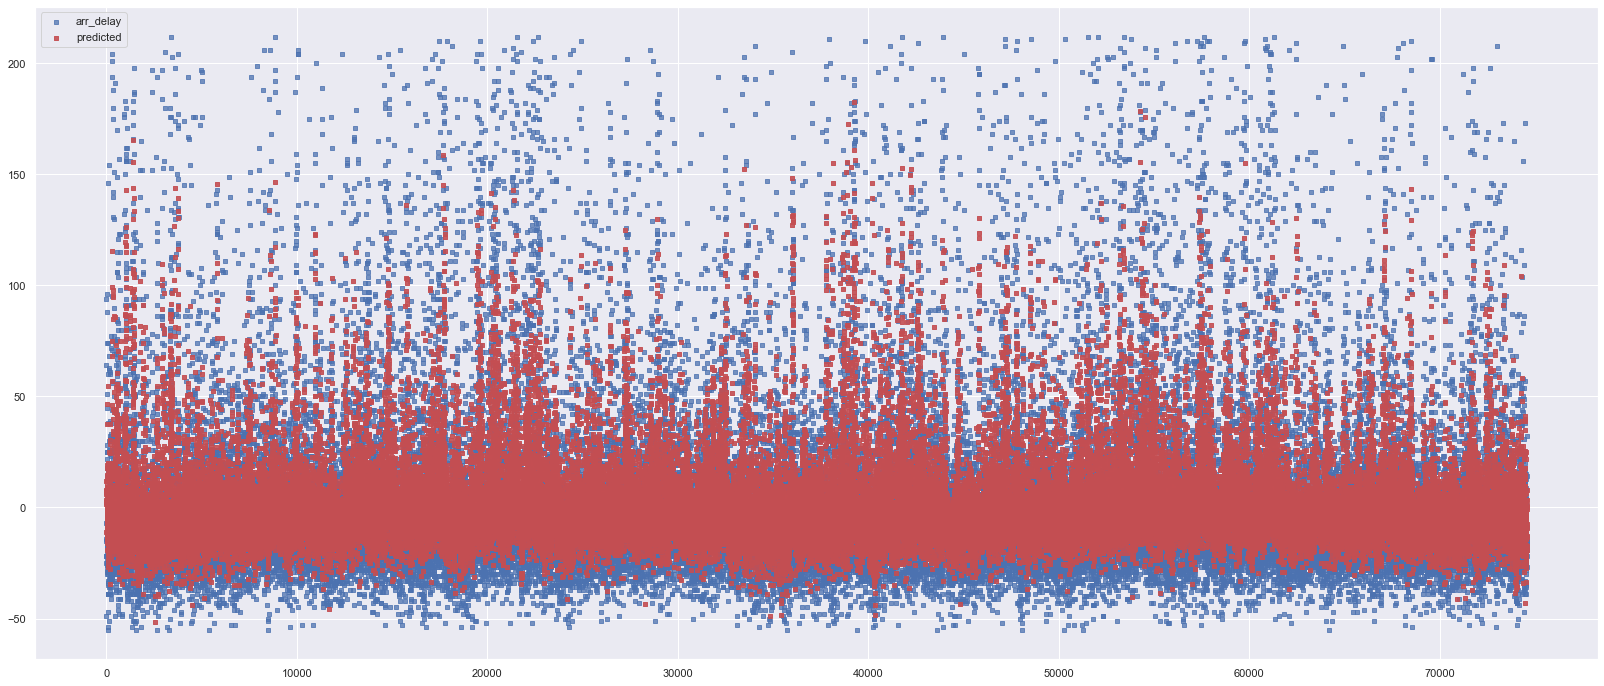

In [139]:
# actual points
x1 = graph_df.index.to_list()
y1 = graph_df['arr_delay']

# predicted points
x2 = graph_df.index.to_list()
y2 = graph_df['predicted']

fig = plt.figure(figsize=(28,12))
ax1 = fig.add_subplot(111)

ax1.scatter(x1, y1, s=20, c='b', marker="s", label='arr_delay', alpha = 0.75)
ax1.scatter(x2, y2, s=20, c='r', marker="s", label='predicted', alpha = 0.9)
plt.legend(loc='upper left');
plt.show()

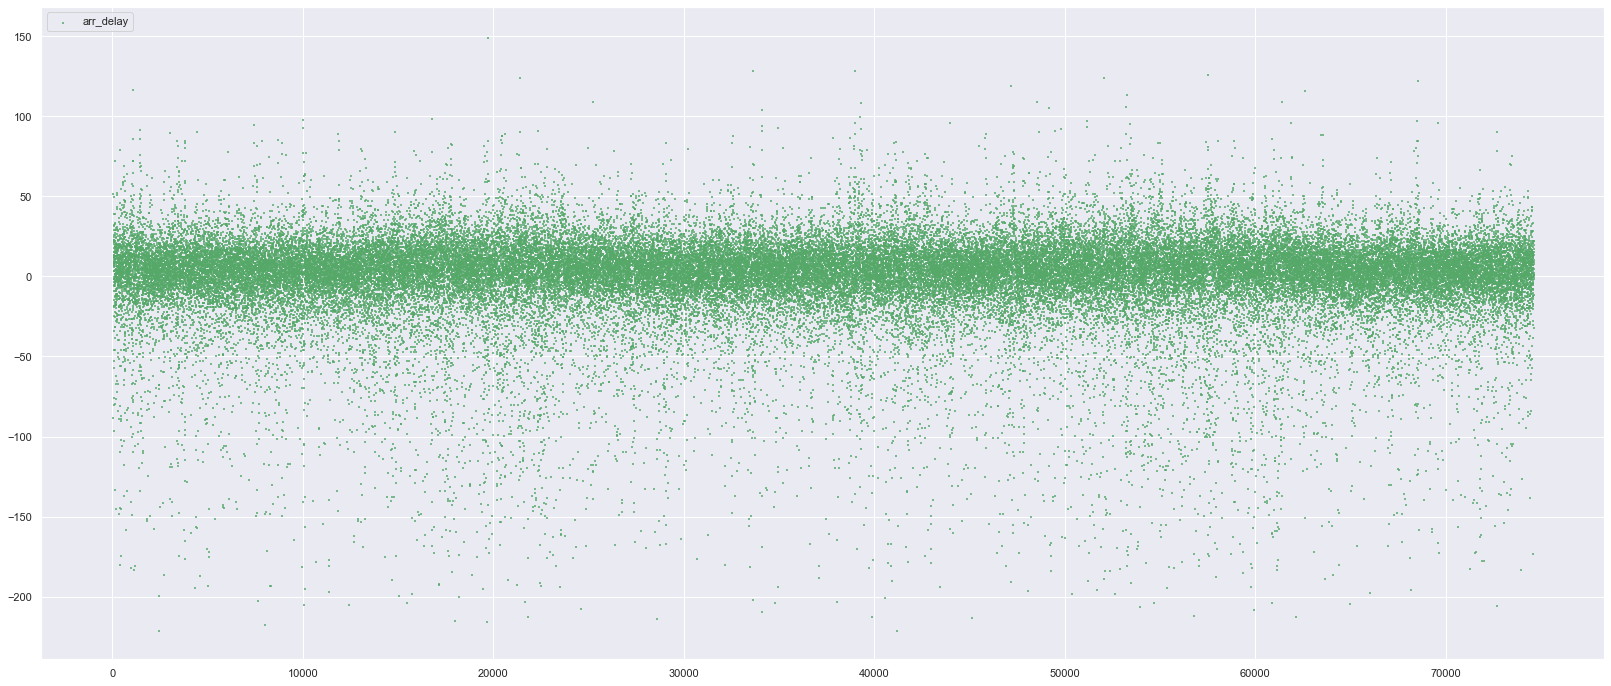

In [72]:
# line 1 points
x1 = graph_df.index.to_list()
y1 = graph_df['difference']

fig = plt.figure(figsize=(28,12))
ax1 = fig.add_subplot(111)

ax1.scatter(x1, y1, s=1, c='g', marker="s", label='arr_delay', alpha = 0.75)
plt.legend(loc='upper left');
plt.show()

# Predict the TEST data

In [73]:
# NOTE - this is the 2020 TEST data
flights = pd.read_csv('delta_flights_test.csv', index_col=0) # the first 7 days of january 2020, with feature_engineered columns - more feature engineering will take place in this notebook

In [74]:
flights.head()

,fl_date,mkt_carrier,origin_airport_id,origin_city_name,dest_airport_id,dest_city_name,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,origin_wind_speed,origin_visibility,origin_conditions,dest_wind_speed,dest_visibility,dest_conditions,day_of_the_week,holiday,year,month,scheduled_flight_hour_of_day
2883,1/1/2020,DL,12953,new york,11278,washington,1900,2022,82,214,15.1,9.9,Overcast,14.7,9.9,Partially cloudy,Wednesday,True,2020,1,19
2715,1/1/2020,DL,13232,chicago,10397,atlanta,600,901,121,591,19.6,9.9,"Snow, Partially cloudy",12.0,9.9,Clear,Wednesday,True,2020,1,6
2714,1/1/2020,DL,10397,atlanta,14747,seattle,1125,1400,335,2182,12.0,9.9,Clear,16.4,9.9,Overcast,Wednesday,True,2020,1,11
2713,1/1/2020,DL,10397,atlanta,12892,los angeles,1925,2120,295,1947,12.0,9.9,Clear,7.5,9.5,Clear,Wednesday,True,2020,1,19
2712,1/1/2020,DL,11278,washington,12478,new york,600,718,78,213,14.7,9.9,Partially cloudy,15.1,9.9,Overcast,Wednesday,True,2020,1,6


In [75]:
origin_airport_id = pd.get_dummies(flights['origin_airport_id'], prefix='origin')
dest_airport_id = pd.get_dummies(flights['dest_airport_id'], prefix='dest')

day_of_week = pd.get_dummies(flights['day_of_the_week'])

In [76]:
# We want to change "Rain, Overcast" to Rain = 1, Cloudy = 1
flights['origin_rain'] = 0
flights['origin_cloudy'] = 0
flights['origin_snow'] = 0
flights['dest_rain'] = 0
flights['dest_cloudy'] = 0
flights['dest_snow'] = 0

# go through each condition, setting all 3 relevant columns
# there is probably a better way but i know this will work for now...

flights.loc[flights['origin_conditions'] == 'Partially cloudy', 'origin_rain'] = 0
flights.loc[flights['origin_conditions'] == 'Partially cloudy', 'origin_cloudy'] = 0.5
flights.loc[flights['origin_conditions'] == 'Partially cloudy', 'origin_snow'] = 0
flights.loc[flights['dest_conditions'] == 'Partially cloudy', 'dest_rain'] = 0
flights.loc[flights['dest_conditions'] == 'Partially cloudy', 'dest_cloudy'] = 0.5
flights.loc[flights['dest_conditions'] == 'Partially cloudy', 'dest_snow'] = 0

flights.loc[flights['origin_conditions'] == 'Clear', 'origin_rain'] = 0
flights.loc[flights['origin_conditions'] == 'Clear', 'origin_cloudy'] = 0
flights.loc[flights['origin_conditions'] == 'Clear', 'origin_snow'] = 0
flights.loc[flights['dest_conditions'] == 'Clear', 'dest_rain'] = 0
flights.loc[flights['dest_conditions'] == 'Clear', 'dest_cloudy'] = 0
flights.loc[flights['dest_conditions'] == 'Clear', 'dest_snow'] = 0

flights.loc[flights['origin_conditions'] == 'Rain, Overcast', 'origin_rain'] = 1
flights.loc[flights['origin_conditions'] == 'Rain, Overcast', 'origin_cloudy'] = 1
flights.loc[flights['origin_conditions'] == 'Rain, Overcast', 'origin_snow'] = 0
flights.loc[flights['dest_conditions'] == 'Rain, Overcast', 'dest_rain'] = 1
flights.loc[flights['dest_conditions'] == 'Rain, Overcast', 'dest_cloudy'] = 1
flights.loc[flights['dest_conditions'] == 'Rain, Overcast', 'dest_snow'] = 0

flights.loc[flights['origin_conditions'] == 'Rain, Partially cloudy', 'origin_rain'] = 1
flights.loc[flights['origin_conditions'] == 'Rain, Partially cloudy', 'origin_cloudy'] = 0.5
flights.loc[flights['origin_conditions'] == 'Rain, Partially cloudy', 'origin_snow'] = 0
flights.loc[flights['dest_conditions'] == 'Rain, Partially cloudy', 'dest_rain'] = 1
flights.loc[flights['dest_conditions'] == 'Rain, Partially cloudy', 'dest_cloudy'] = 0.5
flights.loc[flights['dest_conditions'] == 'Rain, Partially cloudy', 'dest_snow'] = 0

flights.loc[flights['origin_conditions'] == 'Overcast', 'origin_rain'] = 0
flights.loc[flights['origin_conditions'] == 'Overcast', 'origin_cloudy'] = 1
flights.loc[flights['origin_conditions'] == 'Overcast', 'origin_snow'] = 0
flights.loc[flights['dest_conditions'] == 'Overcast', 'dest_rain'] = 0
flights.loc[flights['dest_conditions'] == 'Overcast', 'dest_cloudy'] = 1
flights.loc[flights['dest_conditions'] == 'Overcast', 'dest_snow'] = 0

flights.loc[flights['origin_conditions'] == 'Snow, Partially cloudy', 'origin_rain'] = 0
flights.loc[flights['origin_conditions'] == 'Snow, Partially cloudy', 'origin_cloudy'] = 0.5
flights.loc[flights['origin_conditions'] == 'Snow, Partially cloudy', 'origin_snow'] = 1
flights.loc[flights['dest_conditions'] == 'Snow, Partially cloudy', 'dest_rain'] = 0
flights.loc[flights['dest_conditions'] == 'Snow, Partially cloudy', 'dest_cloudy'] = 0.5
flights.loc[flights['dest_conditions'] == 'Snow, Partially cloudy', 'dest_snow'] = 1

flights.loc[flights['origin_conditions'] == 'Rain', 'origin_rain'] = 1
flights.loc[flights['origin_conditions'] == 'Rain', 'origin_cloudy'] = 0
flights.loc[flights['origin_conditions'] == 'Rain', 'origin_snow'] = 0
flights.loc[flights['dest_conditions'] == 'Rain', 'dest_rain'] = 1
flights.loc[flights['dest_conditions'] == 'Rain', 'dest_cloudy'] = 0
flights.loc[flights['dest_conditions'] == 'Rain', 'dest_snow'] = 0

flights.loc[flights['origin_conditions'] == 'Snow, Overcast', 'origin_rain'] = 0
flights.loc[flights['origin_conditions'] == 'Snow, Overcast', 'origin_cloudy'] = 1
flights.loc[flights['origin_conditions'] == 'Snow, Overcast', 'origin_snow'] = 1
flights.loc[flights['dest_conditions'] == 'Snow, Overcast', 'dest_rain'] = 0
flights.loc[flights['dest_conditions'] == 'Snow, Overcast', 'dest_cloudy'] = 1
flights.loc[flights['dest_conditions'] == 'Snow, Overcast', 'dest_snow'] = 1

flights.loc[flights['origin_conditions'] == 'Snow', 'origin_rain'] = 0
flights.loc[flights['origin_conditions'] == 'Snow', 'origin_cloudy'] = 0
flights.loc[flights['origin_conditions'] == 'Snow', 'origin_snow'] = 1
flights.loc[flights['dest_conditions'] == 'Snow', 'dest_rain'] = 0
flights.loc[flights['dest_conditions'] == 'Snow', 'dest_cloudy'] = 0
flights.loc[flights['dest_conditions'] == 'Snow', 'dest_snow'] = 1

flights = flights.drop(columns=['origin_conditions', 'dest_conditions'])

In [77]:
# include NEW weather columns
df_flights = pd.concat((
    day_of_week,
    flights['month'],
    flights['year'],
    origin_airport_id, 
    #origin_conditions, 
    flights['origin_rain'], 
    flights['origin_cloudy'], 
    flights['origin_snow'], 
    flights['origin_visibility'], 
    flights['origin_wind_speed'],
    dest_airport_id, 
    #dest_conditions, 
    flights['dest_rain'], 
    flights['dest_cloudy'], 
    flights['dest_snow'], 
    flights['dest_visibility'], 
    flights['dest_wind_speed'], 
    flights['holiday'], 
    flights['scheduled_flight_hour_of_day'], 
    flights['distance'],
), axis=1)

df_flights = df_flights.dropna()

# drop columns
columns_to_drop = [
    'Tuesday',
    #'Friday', 
    #'origin_12478', 
    #'dest_11278',
    'origin_10397',
    'dest_10397'
]

df_flights = df_flights.drop(columns=columns_to_drop)

In [78]:
df_flights

,Friday,Monday,Saturday,Sunday,Thursday,Wednesday,month,year,origin_11057,origin_11278,origin_11292,origin_11298,origin_12191,origin_12264,origin_12266,origin_12478,origin_12892,origin_12953,origin_13232,origin_13930,origin_14747,origin_rain,origin_cloudy,origin_snow,origin_visibility,origin_wind_speed,dest_11057,dest_11278,dest_11292,dest_11298,dest_12191,dest_12264,dest_12266,dest_12478,dest_12892,dest_12953,dest_13232,dest_13930,dest_14747,dest_rain,dest_cloudy,dest_snow,dest_visibility,dest_wind_speed,holiday,scheduled_flight_hour_of_day,distance
2883,0,0,0,0,0,1,1,2020,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0,0,9.9,15.1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0,9.9,14.7,True,19,214
2715,0,0,0,0,0,1,1,2020,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.5,1,9.9,19.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,9.9,12.0,True,6,591
2714,0,0,0,0,0,1,1,2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,9.9,12.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.0,0,9.9,16.4,True,11,2182
2713,0,0,0,0,0,1,1,2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,9.9,12.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0,9.5,7.5,True,19,1947
2712,0,0,0,0,0,1,1,2020,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0,9.9,14.7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.0,0,9.9,15.1,True,6,213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0,0,0,0,0,1,1,2020,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0,9.4,6.1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.5,0,9.6,18.4,False,7,2475
295,0,0,0,0,0,1,1,2020,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.5,0,9.9,18.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,9.9,9.5,False,9,731
296,0,0,0,0,0,1,1,2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,9.9,9.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.5,0,9.9,18.5,False,7,731
285,0,0,0,0,0,1,1,2020,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.5,1,9.9,22.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,9.9,9.5,False,15,534


In [79]:
# predict submission values
y_submission = xg_reg.predict(df_flights)

In [80]:
flights['predicted_arr_delay'] = y_submission
flights.head()

,fl_date,mkt_carrier,origin_airport_id,origin_city_name,dest_airport_id,dest_city_name,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,origin_wind_speed,origin_visibility,dest_wind_speed,dest_visibility,day_of_the_week,holiday,year,month,scheduled_flight_hour_of_day,origin_rain,origin_cloudy,origin_snow,dest_rain,dest_cloudy,dest_snow,predicted_arr_delay
2883,1/1/2020,DL,12953,new york,11278,washington,1900,2022,82,214,15.1,9.9,14.7,9.9,Wednesday,True,2020,1,19,0,1.0,0,0,0.5,0,-24.650616
2715,1/1/2020,DL,13232,chicago,10397,atlanta,600,901,121,591,19.6,9.9,12.0,9.9,Wednesday,True,2020,1,6,0,0.5,1,0,0.0,0,-18.099878
2714,1/1/2020,DL,10397,atlanta,14747,seattle,1125,1400,335,2182,12.0,9.9,16.4,9.9,Wednesday,True,2020,1,11,0,0.0,0,0,1.0,0,-12.362728
2713,1/1/2020,DL,10397,atlanta,12892,los angeles,1925,2120,295,1947,12.0,9.9,7.5,9.5,Wednesday,True,2020,1,19,0,0.0,0,0,0.0,0,-2.913759
2712,1/1/2020,DL,11278,washington,12478,new york,600,718,78,213,14.7,9.9,15.1,9.9,Wednesday,True,2020,1,6,0,0.5,0,0,1.0,0,-8.002450


In [81]:
submission_df = flights.copy()

In [82]:
submission_df = submission_df[['fl_date', 'mkt_carrier', 'origin_airport_id', 'origin_city_name', 'dest_airport_id', 'dest_city_name', 'crs_dep_time', 'crs_arr_time', 'predicted_arr_delay']]
submission_df.head()

,fl_date,mkt_carrier,origin_airport_id,origin_city_name,dest_airport_id,dest_city_name,crs_dep_time,crs_arr_time,predicted_arr_delay
2883,1/1/2020,DL,12953,new york,11278,washington,1900,2022,-24.650616
2715,1/1/2020,DL,13232,chicago,10397,atlanta,600,901,-18.099878
2714,1/1/2020,DL,10397,atlanta,14747,seattle,1125,1400,-12.362728
2713,1/1/2020,DL,10397,atlanta,12892,los angeles,1925,2120,-2.913759
2712,1/1/2020,DL,11278,washington,12478,new york,600,718,-8.002450


In [83]:
# export submission to .csv file
submission_df.to_csv('elena_john_submission.csv')